In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

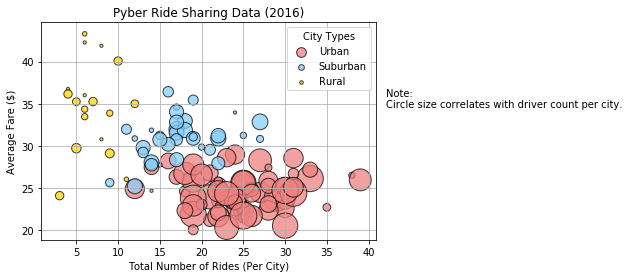

In [2]:
# Obtain the x and y coordinates for each of the three city types

pyber_urban = pyber[pyber.type == 'Urban']
pyber_urban_groups = pyber_urban.groupby(["city"])
number_rides_urban = pyber_urban_groups['ride_id'].count()
average_fare_urban = round(pyber_urban_groups['fare'].sum() / pyber_urban_groups['ride_id'].count(), 2)
driver_count_urban = pyber_urban_groups['driver_count'].max()
city_types_urban = pyber_urban_groups['type'].max()

pyber_suburban = pyber[pyber.type == 'Suburban']
pyber_suburban_groups = pyber_suburban.groupby(["city"])
number_rides_suburban = pyber_suburban_groups['ride_id'].count()
average_fare_suburban = round(pyber_suburban_groups['fare'].sum() / pyber_suburban_groups['ride_id'].count(), 2)
driver_count_suburban = pyber_suburban_groups['driver_count'].max()
city_types_suburban = pyber_suburban_groups['type'].max()

pyber_rural = pyber[pyber.type == 'Rural']
pyber_rural_groups = pyber_rural.groupby(["city"])
number_rides_rural = pyber_rural_groups['ride_id'].count()
average_fare_rural = round(pyber_rural_groups['fare'].sum() / pyber_rural_groups['ride_id'].count(), 2)
driver_count_rural = pyber_rural_groups['driver_count'].max()
city_types_rural = pyber_rural_groups['type'].max()

# Build the scatter plots for each city types

urban = plt.scatter(number_rides_urban, average_fare_urban, s=driver_count_urban*10, facecolors='lightcoral',
                    linewidths=1, edgecolors='black', alpha=0.75, label="Urban")
suburban = plt.scatter(number_rides_suburban, average_fare_suburban, s=driver_count_suburban*10,
                       facecolors='lightskyblue', linewidths=1, edgecolors='black', alpha=0.75, label="Suburban")
rural = plt.scatter(number_rides_rural, average_fare_rural, s=driver_count_rural*10, facecolors='gold',
                    linewidths=1, edgecolors='black', alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(handles=[urban, suburban, rural], loc="upper right", markerscale=0.5, title="City Types")
#Legend(numpoints=None, markerscale=None, markerfirst=True, scatterpoints=None, scatteryoffsets=None, prop=None, fontsize=None, borderpad=None, labelspacing=None, handlelength=None, handleheight=None, handletextpad=None, borderaxespad=None, columnspacing=None, ncol=1, mode=None, fancybox=None, shadow=None, title=None, title_fontsize=None, framealpha=None, edgecolor=None, facecolor=None, bbox_to_anchor=None, bbox_transform=None, frameon=None, handler_map=None)

# Incorporate a text label regarding circle size
plt.annotate('Note:\nCircle size correlates with driver count per city.',
             xy=(1,0.5), xytext=(10, 40), xycoords=('axes fraction', 'figure fraction'),
             textcoords='offset points',
             horizontalalignment='left',
             verticalalignment='center')
plt.show()

# Save Figure
plt.savefig("data/pyber_bubble_plot.png")

## Total Fares by City Type

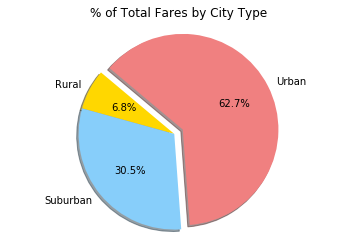

In [3]:
# Calculate Type Percents
pyber_groups = pyber.groupby(["type"])
fares_sum = pyber_groups['fare'].sum()


# Build Pie Chart
labels_f = ['Rural', 'Suburban', 'Urban']
colors_f = ['gold', 'lightskyblue', 'lightcoral']
explode_f = (0, 0, 0.1)

plt.pie(fares_sum, explode=explode_f, labels=labels_f, colors=colors_f, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig("data/pyber_fares_pieplot.png")

## Total Rides by City Type

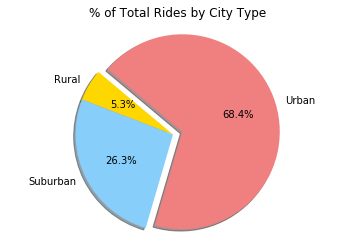

In [4]:
# Calculate Ride Percents
rides_count = pyber_groups['ride_id'].count()

# Build Pie Chart
labels_r = ['Rural', 'Suburban', 'Urban']
colors_r = ['gold', 'lightskyblue', 'lightcoral']
explode_r = (0, 0, 0.1)

plt.pie(rides_count, explode=explode_r, labels=labels_r, colors=colors_r, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig("data/pyber_rides_pieplot.png")

## Total Drivers by City Type

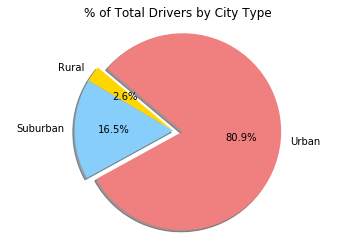

In [5]:
# Calculate Driver Percents
drivers_count = [driver_count_rural.sum(), driver_count_suburban.sum(), driver_count_urban.sum()]

# Build Pie Charts
labels_d = ['Rural', 'Suburban', 'Urban']
colors_d = ['gold', 'lightskyblue', 'lightcoral']
explode_d = (0, 0, 0.1)

plt.pie(drivers_count, explode=explode_r, labels=labels_r, colors=colors_r, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig("data/pyber_drivers_pieplot.png")

# Pyber Analysis


* The data shows that there is a fierce competition for ride sharing in urban settings. About 81% of the drivers are located in an urban area. However, they "only" complete 68% of the total rides and collect 63% of the total fares. The field is less crowded in suburban areas where 16.5% of the total number of drivers complete about 26% of the total number of rides and collect a whopping 30.5% of the total market fares. The ratios of number or drivers to share of rides completed and total fares collected is even better in rural areas.

* The bubble plot reveals a clear market segmentation by city type, with overcrowded urban areas driving the average fare down despite the large number of rides requested. The more urban the area, the higher the number of rides and the lower the average fare, in part because of the higher count of drivers, and in part because of the nature of cities where rides are shorter in distance than in suburban and rural areas.

* Both the bubble chart and the trio of pie charts point towards business opportunities in suburban areas where the market is growing and more profitable per ride than in urban areas. Finally, the rural areas constitute a very small, but highly profitable market, where Pyber could try to position itself ahead of the game. 